<a href="https://colab.research.google.com/github/cfr3yt/cfr3yt.github.io/blob/main/Week_12-2/Decision_Tree_Classifition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

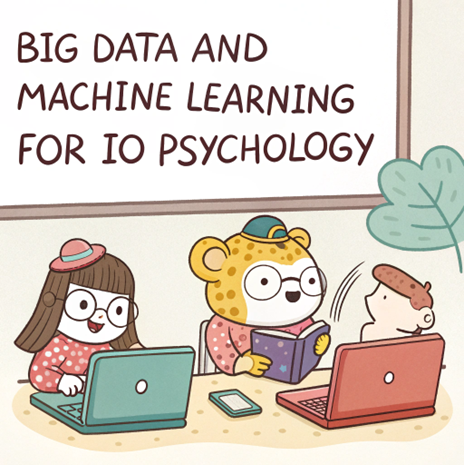

Dr. Philseok Lee @ George Mason University, IO Psy Program

# **Decision Tree Model**

A **decision tree model** is classificiation and predictive modeling tool used in machine learning and data analysis to make decisions or predictions based on input data. It’s structured like a tree, with a flowchart-like representation that breaks down a decision-making process into a series of choices, leading to a final outcome.

🔥 **I will present a demonstration of a decision tree model using the same dataset that was used in logistic regression.**

Suppose your organization has implemented a series of voluntary workplace safety training programs and gathered feedback from 4,120 participating employees. **The goal is to assess and improve the training experience for future employees.**

As part of this initiative, **your organization wants to develop a machine learning classifier to predict whether a participant would recommend the training program to others.**

**Through this analysis, let's say that your organization wants to get some important organizational implications:**

**1. Improved Program Design:**

  *   Insights from the model can identify which aspects of training (e.g., clarity, engagement, instructor quality) most influence employee satisfaction. This helps tailor future programs to maximize impact and recommendation.


**2. Strategic Resource Allocation:**
  * If fac (instructors) has a high predictive value, the organization may prioritize hiring or training better instructors, recognizing their influence on overall program success.

**3. Employee Engagement & Trust:**
  * Leveraging feedback in a data-driven way shows employees that their voices matter.

**4. Scalability of Training:**
  * With a model that can predict positive recommendations, the company can roll out similar programs more confidently across other departments or regions.

**5. Culture of Continuous Improvement:**
  * Using models like this can instill a feedback-driven culture, where learning experiences are continuously refined based on measurable outcomes.

💐 **The dataset contains the following variables:**

**1.	rec:** A binary value indicating **whether the participant would recommend** **the training program to others**, No = 0, Yes = 1.

**2.	rel:** A rating by the participant on the **relevance of the program to their work**, where 1 is very low and 5 is very high

**3.	fun:** A rating of **how enjoyable and fun the program** was for the participant, where 1 is very low and 5 is very high

**4.	clar:** A participant **rating of the clarity of the content and training** in the program, where 1 is very low and 5 is very high

**5.	home:** A participant rating of the **quality of the homework or project work** in the program, where 1 is very low and 5 is very high

**6.	class:** A participant rating of the **quality of the overall session** who attended the program, where 1 is very low and 5 is very high

**7.	fac:** A participant rating of the **quality of the program’s instructors**, where 1 is very low and 5 is very high


# **1. Import Necessary Libraries and Pakages**

In [1]:
# For data preprocessing
import numpy as np  # for numerical computing in Python
import pandas as pd  # for data manipulation and analysis
from sklearn.preprocessing import StandardScaler  # for feature scaling

# For Machine Learning and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV  # data splitting and hyperparameter tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc  # evaluation metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text  # decision tree models and visualization

# For Data Visualization
import matplotlib.pyplot as plt

# **2. Import Dataset and Rename**

In [2]:
# Google Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Construct the full path to your CSV file
file_path = '/content/drive/MyDrive/Psy592_892/Decision_Tree_Model/Classification/Example.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)
print(data.info())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Psy592_892/Decision_Tree_Model/Classification/Example.csv'

In [ ]:
# Rename variables
data.rename(columns={
    'rec':'recommendation',
    'rel': 'relevance' ,
    'fun' : 'fun_enjoyable',
    'clar' : 'clarity',
    'home' : 'homework_quality',
    'class' : 'class_quality',
    'fac' : 'instructors_quality'
}, inplace=True)
# "inplace=True" means the changes are applied directly to the original DataFrame (data) rather than creating a new copy.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   recommendation       4120 non-null   int64
 1   relevance            4120 non-null   int64
 2   fun_enjoyable        4120 non-null   int64
 3   clarity              4120 non-null   int64
 4   homework_quality     4120 non-null   int64
 5   class_quality        4120 non-null   int64
 6   instructors_quality  4120 non-null   int64
dtypes: int64(7)
memory usage: 225.4 KB


🔥🔥🔥 **In scikit-learn, the target variable (y) in classification model should typically be "integers" like 0 and 1** rather than strings, objects, or categorical types directly. Make sure that the outcomes are integers.

# **3. Exploratory Data Analysis (EDA)**

In this example, I skipped the exploratory data analysis

# **4. Data Preprocessing: Data Partition and Scaling**

In [ ]:
#  Data partition: Training set and Test set
X = data.drop('recommendation', axis=1)
y = data['recommendation']
X_train, X_test, y_train, y_test = train_test_split(X, #Represents the feature set
                                                    y, #Represents the target variable
                                                    test_size=0.3, #30% of the data goes to the test set, meaning 70% will be used for training.
                                                    stratify=y, #Ensures the proportion of classes in y is preserved in both the training and test sets. Not needed for regression test
                                                    random_state=123) #Sets a seed for the random number generator, ensuring reproducibility.


# **5. Hyperparameter Tuning with Cross-Validation**

We define a parameter grid for the DecisionTreeClassifier and use GridSearchCV
to try various hyperparameters using 5-fold cross-validation.

In [ ]:
param_grid = {
    'max_depth': [2, 3], # For the sake of this demonstration, I’ve limited the example to values 2 and 3. However, in a real-world analysis, I recommend experimenting with a broader range of options.
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

* **max_depth:** By including more depth options such as [None, 2, 3, 4, 5, 10, 15], you allow the grid search to assess both shallow trees (which tend to underfit) and deeper trees (which might overfit).

* **min_samples_split:** Testing values like [2, 5, 10, 15] can help find a balance between a tree that splits too frequently (potentially overfitting) versus not splitting enough (potentially underfitting).

* **min_samples_leaf:** Including [1, 2, 4] ensures the grid search can check how creating more robust leaves (by enforcing a minimum number of samples) might affect performance.

* **criterion:** The options ['gini', 'entropy'] determine the function used to measure the quality of a split.

* **splitter:** Strategy for choosing the split at each node.
  * **Values**:
    * **'best'**: Picks the best split based on the criterion (e.g., lowest Gini or highest information gain).
    * **'random'**: Chooses the best split from a random subset of features.
  * **Purpose**: 'best' optimizes accuracy but is slower; 'random' is faster and can help avoid overfitting by introducing randomness.


In [ ]:
# Initialize the Decision Tree Classifier with a fixed random_state for reproducibility.
dtc = DecisionTreeClassifier(random_state=123)

In [ ]:
# Set up the grid search with 10-fold cross-validation
# Total Models Trained: With 336 combinations and 10 folds, it trains 3,360 models (336 × 10).
grid_search = GridSearchCV(dtc, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 15],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [ ]:
# Display the best parameters and best cross-validation accuracy score
print("Best Parameters found: ", grid_search.best_params_)
print("Best Cross-Validation ROC_AUC: {:.4f}".format(grid_search.best_score_))

Best Parameters found:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation ROC_AUC: 0.7899


# **6.Evaluate the Best Model on Train Data**

In [ ]:
best_model = grid_search.best_estimator_  # The best model from grid search

In [ ]:
# --- Training Data Evaluation ---
y_train_pred = best_model.predict(X_train)
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))


Training Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1655
           1       0.71      0.67      0.69      1229

    accuracy                           0.74      2884
   macro avg       0.74      0.73      0.74      2884
weighted avg       0.74      0.74      0.74      2884



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Extract TN, FP, FN, TP from confusion matrix
# For binary classification: cm = [[TN, FP], [FN, TP]]
TN, FP = cm[0, 0], cm[0, 1]  # Row 0: Actual negatives (class 0)
FN, TP = cm[1, 0], cm[1, 1]  # Row 1: Actual positives (class 1)

# Calculate specificity for class 0 (negative class)
specificity_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
print(f"\nSpecificity for Class 0 (Non-recommendation): {specificity_0:.4f}")

# Calculate specificity for class 1 (positive class, if interpreted as negative in a flipped context)
specificity_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"Specificity for Class 1 (Recommendation): {specificity_1:.4f}")


Specificity for Class 0 (Non-recommendation): 0.7946
Specificity for Class 1 (Recommendation): 0.6737


# **7.Evaluate the Best Model on Test Data**

In [ ]:
# Evaluate testing model performance
y_test_pred = best_model.predict(X_test)  # Predictions on the test set
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       709
           1       0.66      0.67      0.66       527

    accuracy                           0.71      1236
   macro avg       0.71      0.71      0.71      1236
weighted avg       0.71      0.71      0.71      1236



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TN, FP, FN, TP from confusion matrix
# For binary classification: cm = [[TN, FP], [FN, TP]]
TN, FP = cm[0, 0], cm[0, 1]  # Row 0: Actual negatives (class 0)
FN, TP = cm[1, 0], cm[1, 1]  # Row 1: Actual positives (class 1)

# Calculate specificity for class 0 (negative class)
specificity_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
print(f"\nSpecificity for Class 0 (Non-recommendation): {specificity_0:.4f}")

# Calculate specificity for class 1 (positive class, if interpreted as negative in a flipped context)
specificity_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"Specificity for Class 1 (Recommendation): {specificity_1:.4f}")


Specificity for Class 0 (Non-recommendation): 0.7447
Specificity for Class 1 (Recommendation): 0.6679


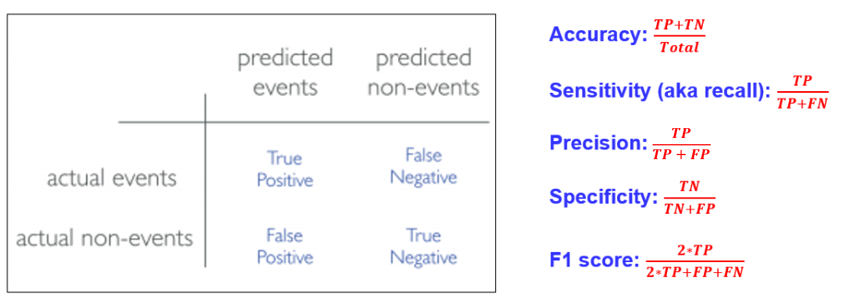

🌻💮🥀 **Evaluation Metrics**
* **Accuracy:** Overall, how often is the classifier correct? (Measures overall correctness)
* **Sensitivity (aka recall):** How accurately does the classifier classify actual events? (Measures the proportion of actual positives correctly identified)
* **Precision:** When the classifier says 'yes,' how often is it right? (The proportion of positive predictions that are actually correct)
* **Specificity:** How accurately does the classifier classify actual non-events? (Measures the proportion of actual negatives correctly identified)
* **F1 score:** Harmonic mean of precision and recall

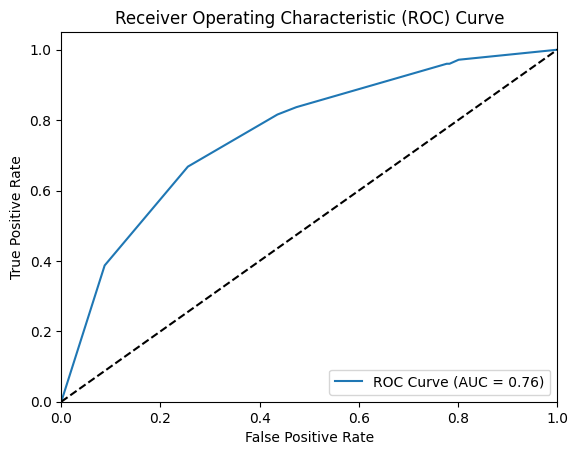

In [ ]:
# ================================
# ROC Curve and AUC (Binary Classification Only)
# ================================
# ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve)
# are applicable only when you have a binary classification problem.

if len(np.unique(y)) == 2:
    # Predict probabilities for the positive class
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # Reference line for random performance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification problems.")

# **8. Decision Tree plot**

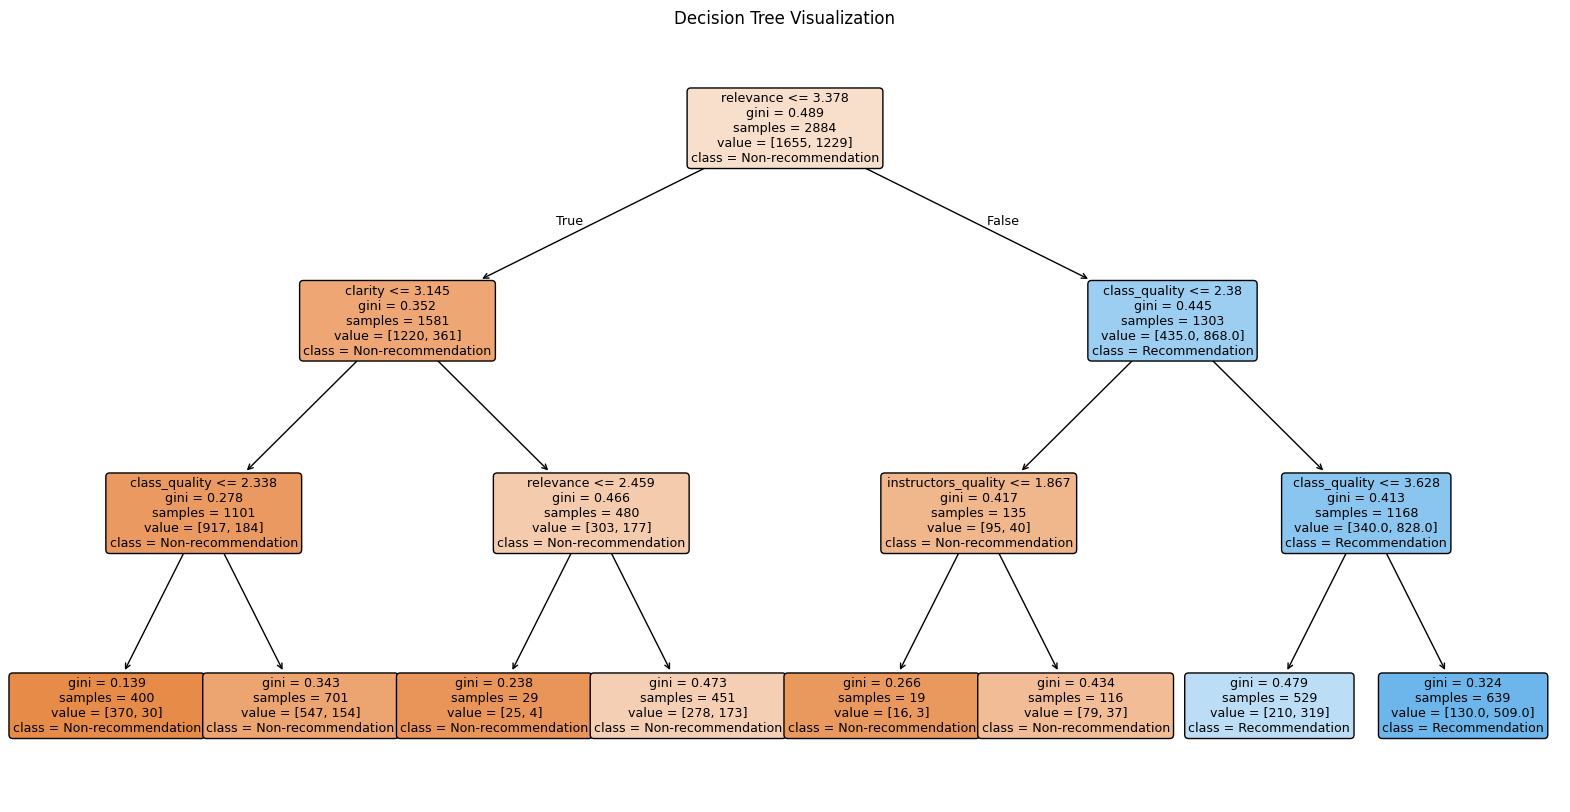

In [ ]:
# Create a figure for the decision tree plot
plt.figure(figsize=(20, 10))
# Plot the decision tree from the best model:
# - feature_names are provided for clarity
# - class_names is a list that distinguishes between classes (update the names if necessary)
# - filled=True colors the nodes based on class purity; rounded=True adds rounded corners
plot_tree(best_model,
          feature_names=X_train.columns,
          class_names=['Non-recommendation', 'Recommendation'],
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

**Summary of Decision Rules (If, Then Format)**

Based on the tree, here are the "If, then" rules:

* If relevance <= 3.378 and clarity <= 3.145 and class_quality <= 2.338, then predict "Non-recommendation" (400 samples).
* If relevance <= 3.378 and clarity <= 3.145 and class_quality > 2.338, then predict "Non-recommendation" (701 samples).
* If relevance <= 3.378 and clarity > 3.145 and relevance <= 2.459, then predict "Non-recommendation" (229 samples).
* If relevance <= 3.378 and clarity > 3.145 and relevance > 2.459, then predict "Non-recommendation" (451 samples).
* If relevance > 3.378 and class_quality <= 2.338 and instructors_quality <= 1.867, then predict "Non-recommendation" (19 samples).
* If relevance > 3.378 and class_quality <= 2.338 and instructors_quality > 1.867, then predict "Non-recommendation" (116 samples).
* If relevance > 3.378 and class_quality > 2.338 and class_quality <= 3.628, then predict "Recommendation" (529 samples).
* If relevance > 3.378 and class_quality > 2.338 and class_quality > 3.628, then predict "Recommendation" (639 samples).

**If you want to download the graph...**

In [ ]:
!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    best_model,
    out_file="tree.dot",  # Saves the tree as a DOT file
    feature_names=X_train.columns,  # Same feature names as before
    class_names=['Non-recommendation', 'Recommendation'],  # Same class names
    filled=True,  # Color nodes based on purity
    rounded=True,  # Rounded corners for aesthetics
    special_characters=True  # Handles special characters in feature names
)

# Convert the DOT file to a visual (e.g., PNG or PDF) using graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("decision_tree", format="png", cleanup=True)

'decision_tree.png'

In [ ]:
# ================================
# Print Decision Tree Rules (If, Then)
# ================================
# Extract and print the decision rules in "If, then" format
rules = export_text(best_model, feature_names=list(X_train.columns))
print("\nDecision Tree Rules:\n")
print(rules)


Decision Tree Rules:

|--- relevance <= 3.38
|   |--- clarity <= 3.15
|   |   |--- class_quality <= 2.34
|   |   |   |--- class: 0
|   |   |--- class_quality >  2.34
|   |   |   |--- class: 0
|   |--- clarity >  3.15
|   |   |--- relevance <= 2.46
|   |   |   |--- class: 0
|   |   |--- relevance >  2.46
|   |   |   |--- class: 0
|--- relevance >  3.38
|   |--- class_quality <= 2.38
|   |   |--- instructors_quality <= 1.87
|   |   |   |--- class: 0
|   |   |--- instructors_quality >  1.87
|   |   |   |--- class: 0
|   |--- class_quality >  2.38
|   |   |--- class_quality <= 3.63
|   |   |   |--- class: 1
|   |   |--- class_quality >  3.63
|   |   |   |--- class: 1



# **9. Feature Importance**

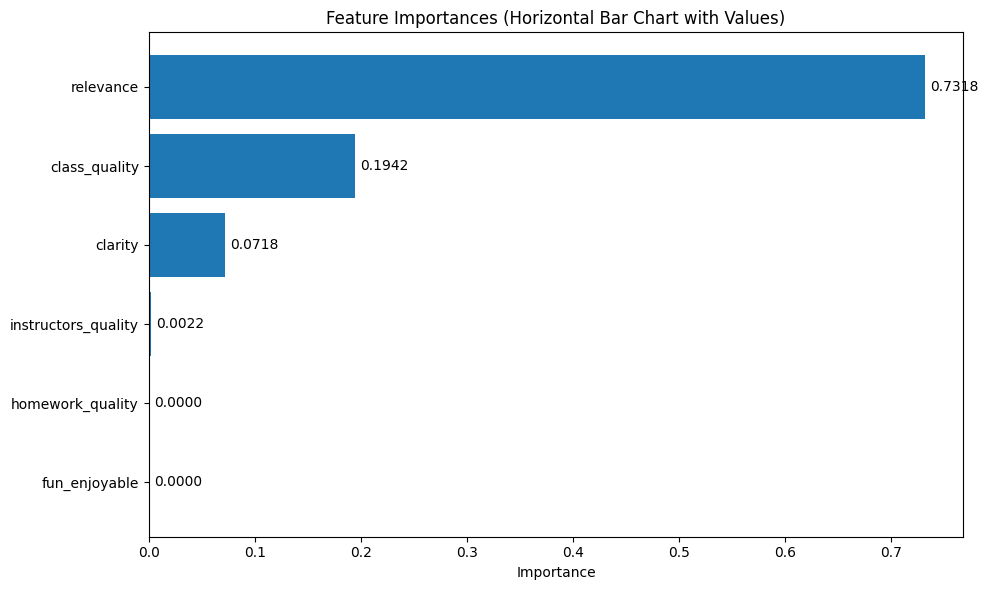

In [ ]:
# Extract the feature importances from the best model
importances = best_model.feature_importances_
features = X_train.columns

# Sort the feature importances in ascending order
indices = np.argsort(importances)
sorted_features = features[indices]
sorted_importances = importances[indices]

# Create a horizontal bar chart for the sorted feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Horizontal Bar Chart with Values)")
bars = plt.barh(range(len(sorted_features)), sorted_importances, align='center')

# Annotate each bar with its corresponding importance value (formatted to 4 decimal places)
for i, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.005,  # Slightly offset to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically on the bar
        f'{bar.get_width():.4f}',  # Format the importance value to 4 decimal places
        va='center'
    )

# Set y-axis labels to the corresponding feature names
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel("Importance")
plt.tight_layout()
plt.show()